In [81]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_squared_error

In [2]:
drugs = pd.read_csv('Downloads/drug200.csv')

In [3]:
drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
features_to_encode = ['Sex', 'BP', 'Cholesterol', 'Drug']

In [6]:
for i in features_to_encode:
    encoder = LabelEncoder()
    drugs[i] = encoder.fit_transform(drugs[i])

In [7]:
drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [75]:
features = ['Sex', 'BP', 'Cholesterol', 'Age', 'Na_to_K']
X = drugs[features]

In [76]:
y = drugs['Drug']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [88]:
dec_clf = DecisionTreeClassifier()
# dec_clf.fit(x_train, y_train)


param_grid = {
    'max_depth': [2,3,4,5,6,7],
    'min_samples_split': [2,4,6,8,10],
    'max_leaf_nodes': [4,6,8,10,12,14],
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy']
}

gs = RandomizedSearchCV(dec_clf, param_grid, cv=5)
gs.fit(x_train, y_train)

print(f'Best score is {gs.best_score_} for {gs.best_params_}')
model = gs.best_estimator_

Best score is 0.9875 for {'splitter': 'best', 'min_samples_split': 4, 'max_leaf_nodes': 14, 'max_depth': 5, 'criterion': 'gini'}


In [89]:
model.score(x_test, y_test)

1.0

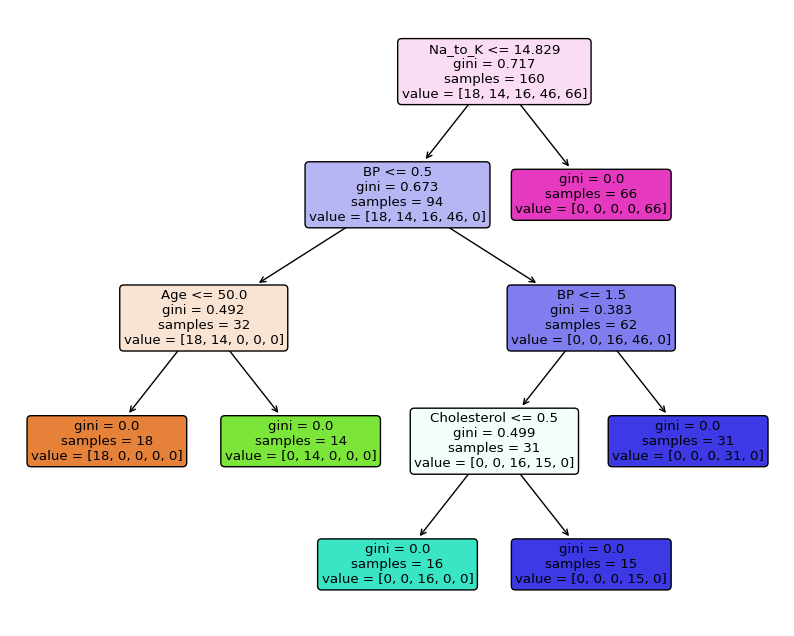

In [90]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming clf is your DecisionTreeClassifier object
plt.figure(figsize=(10,8))  # Set the figure size
plot_tree(model, feature_names=features, filled=True, rounded=True)
plt.show()

## Best score is 0.98125 for {'max_depth': 4, 'max_leaf_nodes': 6, 'min_samples_split': 2}